In [1]:
pip install yfinance pandas numpy matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Dict, Tuple, Optional

In [41]:
class MarketBasketAnalyzer:
    def __init__(self):
        self.stock_data = {}
        self.correlation_matrix = None
    
    def fetch_stock_data(
        self,
        tickers: List[str],
        start_date: Optional[str] = None,
        end_date: Optional[str] = None,
        period: str = "1y"
    ) -> Dict[str, pd.DataFrame]:
        try:
            if start_date and end_date:
                for ticker in tickers:
                    stock = yf.Ticker(ticker)
                    self.stock_data[ticker] = stock.history(
                        start=start_date,
                        end=end_date
                    )
            else:
                for ticker in tickers:
                    stock = yf.Ticker(ticker)
                    self.stock_data[ticker] = stock.history(period=period)
            return self.stock_data
        except Exception as e:
            print(f"Error fetching stock data: {str(e)}")
            return {}

In [17]:
analyzer = MarketBasketAnalyzer()
retail_stocks = ["WMT","TGT","COST"]
data = analyzer.fetch_stock_data(retail_stocks)
print(data["WMT"].head())

                                Open       High        Low      Close  \
Date                                                                    
2024-02-08 00:00:00-05:00  55.791274  56.176654  55.712223  55.787983   
2024-02-09 00:00:00-05:00  55.794572  55.906564  55.639761  55.758339   
2024-02-12 00:00:00-05:00  55.741869  56.114074  55.682578  56.094311   
2024-02-13 00:00:00-05:00  56.199716  56.347941  55.425661  55.712227   
2024-02-14 00:00:00-05:00  55.583766  55.626584  55.185211  55.534359   

                             Volume  Dividends  Stock Splits  
Date                                                          
2024-02-08 00:00:00-05:00  14427900        0.0           0.0  
2024-02-09 00:00:00-05:00  14329800        0.0           0.0  
2024-02-12 00:00:00-05:00  14795100        0.0           0.0  
2024-02-13 00:00:00-05:00  18574200        0.0           0.0  
2024-02-14 00:00:00-05:00  18484500        0.0           0.0  


In [18]:
print("Available data columns:", data["WMT"].columns.tolist())

Available data columns: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']


In [52]:
class MarketBasketAnalyzer:
    def __init__(self):
        self.stock_data = {}
        self.correlation_matrix = None
    
    def fetch_stock_data(
        self,
        tickers: List[str],
        start_date: Optional[str] = None,
        end_date: Optional[str] = None,
        period: str = "1y"
    ) -> Dict[str, pd.DataFrame]:
        try:
            if start_date and end_date:
                for ticker in tickers:
                    stock = yf.Ticker(ticker)
                    self.stock_data[ticker] = stock.history(
                        start=start_date,
                        end=end_date
                    )
            else:
                for ticker in tickers:
                    stock = yf.Ticker(ticker)
                    self.stock_data[ticker] = stock.history(period=period)
            return self.stock_data
        except Exception as e:
            print(f"Error fetching stock data: {str(e)}")
            return {}

    def calculate_correlations(self) -> pd.DataFrame:
        try:
            # Create DataFrame with closing prices for all stocks
            closing_prices = pd.DataFrame()
            
            for ticker, data in self.stock_data.items():
                closing_prices[ticker] = data['Close']
            
            self.correlation_matrix = closing_prices.corr()
            return self.correlation_matrix
            
        except Exception as e:
            print(f"Error calculating correlations: {str(e)}")
            return pd.DataFrame()

In [53]:
analyzer = MarketBasketAnalyzer()
tickers = ["WMT", "TGT", "COST", "KR"]
data = analyzer.fetch_stock_data(tickers)
correlations = analyzer.calculate_correlations()
print("\nCorrelation Matrix:")
print(correlations)


Correlation Matrix:
           WMT       TGT      COST        KR
WMT   1.000000 -0.615913  0.949733  0.783315
TGT  -0.615913  1.000000 -0.675198 -0.267432
COST  0.949733 -0.675198  1.000000  0.640551
KR    0.783315 -0.267432  0.640551  1.000000


In [55]:
class MarketBasketAnalyzer:
    def __init__(self):
        self.stock_data = {}
        self.correlation_matrix = None
    
    def fetch_stock_data(
        self,
        tickers: List[str],
        start_date: Optional[str] = None,
        end_date: Optional[str] = None,
        period: str = "1y"
    ) -> Dict[str, pd.DataFrame]:
        try:
            if start_date and end_date:
                for ticker in tickers:
                    stock = yf.Ticker(ticker)
                    self.stock_data[ticker] = stock.history(
                        start=start_date,
                        end=end_date
                    )
            else:
                for ticker in tickers:
                    stock = yf.Ticker(ticker)
                    self.stock_data[ticker] = stock.history(period=period)
            return self.stock_data
        except Exception as e:
            print(f"Error fetching stock data: {str(e)}")
            return {}

    def calculate_correlations(self) -> pd.DataFrame:
        try:
            # Create DataFrame with closing prices for all stocks
            closing_prices = pd.DataFrame()
            
            for ticker, data in self.stock_data.items():
                closing_prices[ticker] = data['Close']
            
            self.correlation_matrix = closing_prices.corr()
            return self.correlation_matrix
            
        except Exception as e:
            print(f"Error calculating correlations: {str(e)}")
            return pd.DataFrame()

    def plot_correlation_heatmap(self) -> None:
        if self.correlation_matrix is None:
            self.calculate_correlations()

        plt.figure(figsize=(10,8))
        sns.heatmap(
            self.correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0
        )
        plt.title("Stock Price Correlations")
        plt.tight_layout()
        plt.show()

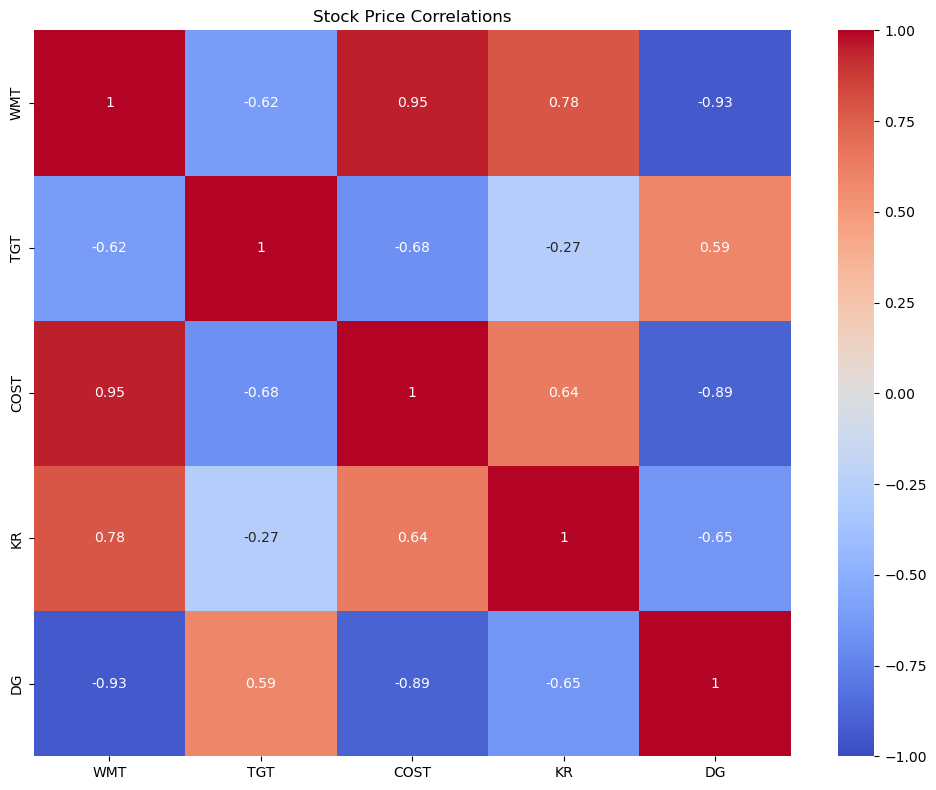

In [56]:
analyzer = MarketBasketAnalyzer()
tickers = ["WMT", "TGT", "COST", "KR", "DG"]
data = analyzer.fetch_stock_data(tickers)
correlations = analyzer.calculate_correlations()
analyzer.plot_correlation_heatmap()

In [58]:
class MarketBasketAnalyzer:
    def __init__(self):
        self.stock_data = {}
        self.correlation_matrix = None
    
    def fetch_stock_data(
        self,
        tickers: List[str],
        start_date: Optional[str] = None,
        end_date: Optional[str] = None,
        period: str = "1y"
    ) -> Dict[str, pd.DataFrame]:
        try:
            if start_date and end_date:
                for ticker in tickers:
                    stock = yf.Ticker(ticker)
                    self.stock_data[ticker] = stock.history(
                        start=start_date,
                        end=end_date
                    )
            else:
                for ticker in tickers:
                    stock = yf.Ticker(ticker)
                    self.stock_data[ticker] = stock.history(period=period)
            return self.stock_data
        except Exception as e:
            print(f"Error fetching stock data: {str(e)}")
            return {}

    def calculate_correlations(self) -> pd.DataFrame:
        try:
            # Create DataFrame with closing prices for all stocks
            closing_prices = pd.DataFrame()
            
            for ticker, data in self.stock_data.items():
                closing_prices[ticker] = data['Close']
            
            self.correlation_matrix = closing_prices.corr()
            return self.correlation_matrix
            
        except Exception as e:
            print(f"Error calculating correlations: {str(e)}")
            return pd.DataFrame()

    def plot_correlation_heatmap(self) -> None:
        if self.correlation_matrix is None:
            self.calculate_correlations()

        plt.figure(figsize=(10,8))
        sns.heatmap(
            self.correlation_matrix,
            annot=True,
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            center=0
        )
        plt.title("Stock Price Correlations")
        plt.tight_layout()
        plt.show()

    def analyze_returns(self) -> pd.DataFrame:
        try:
            returns = pd.DataFrame()
            for ticker, data in self.stock_data.items():
                returns[ticker] = data["Close"].pct_change()

            plt.figure(figsize=(12,6))
            for ticker in returns.columns:
                sns.kdeplot(data=returns[ticker].dropna(), label=ticker)
            
            plt.title("Distribution of Daily Returns")
            plt.xlabel("Daily Returns")
            plt.ylabel("Density")
            plt.legend()
            plt.show()

            return returns
        
        except Exception as e:
            print(f"Error analyzing returns: {str(e)}")
            return pd.DataFrame()

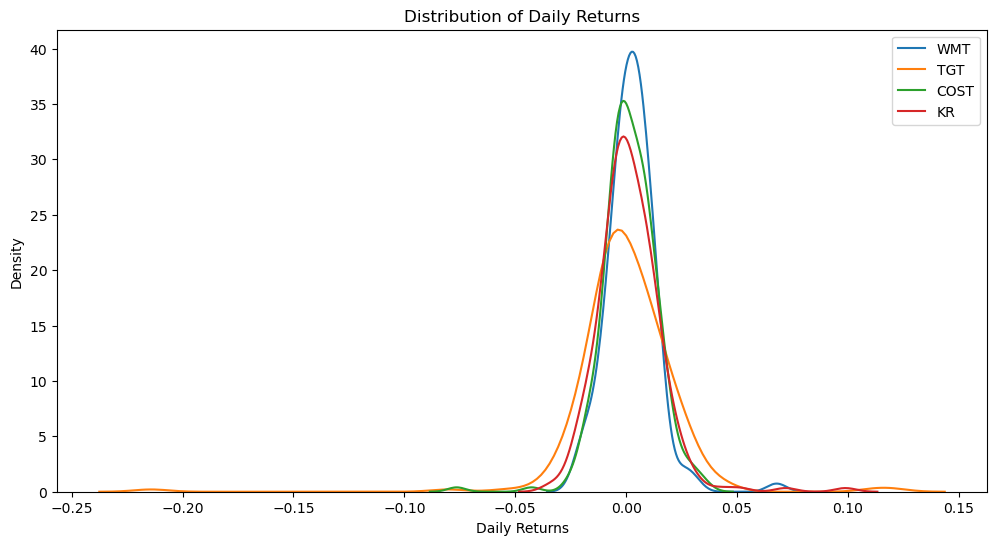

In [59]:
analyzer = MarketBasketAnalyzer()
tickers = ["WMT", "TGT", "COST", "KR"]
analyzer.fetch_stock_data(tickers)
returns = analyzer.analyze_returns()